<!-- dom:TITLE: Nuclear Models -->
# Nuclear Models

<!-- Authors: -->
**Current notebook: Kyle Godbey**

**Original notebook: Morten Hjorth-Jensen**

Date: **NS3 Nuclear Physics Summer School 2022**

<!-- !split  -->
## Stability of matter
To understand why matter is stable, and thereby shed light on the limits of 
nuclear stability, is one of the 
overarching aims and intellectual challenges 
of basic research in nuclear physics. To relate the stability of matter
to the underlying fundamental forces and particles of nature as manifested in nuclear matter, is central
to present and planned rare isotope facilities.



Important properties of nuclear systems which can reveal information about these topics 
are for example masses, and thereby binding energies, and density distributions of nuclei.  
These are quantities which convey important information on 
the shell structure of nuclei, with their 
pertinent magic numbers and shell closures or the  eventual disappearence of the latter 
away from  the valley of stability.



## Motivation and the many scales of the nuclear many-body problem
To understand nuclei and nuclear matter theoretically means
* Understand how the laws of motion and  the fundamental forces at play govern the **nuclear world**

* Quantum Chromodynamics with quarks and gluons is the model for the strong force

* The degrees of freedom from quarks and gluons are too complicated for an *effective* theoretical study of nuclei and nuclear matter

* Effective degrees of freedom (*dof*) in terms of protons, neutrons and selected mesons like pions. These *dof* lead to an effective field theory for the nuclear forces 

* Solve the nuclear many-body problem using various mathematical algorithms, large scale diagonalization, renormalization techniques, quantum computing, machine learning, lattice quantum chromodynamics etc etc. The math spans from eigenvalue problems to stochastic modeling.



## Where to find the material

The main Github address for all material (including any material from Pablo and Taylor) is at <https://github.com/kylegodbey/NS3-2022>

Feel free to use this material as you wish.




<!-- !split  -->
## Mean-field picture, which potential do we opt for?
A simple potential model which enjoys quite some popularity in nuclear
physics, is the **three-dimensional harmonic oscillator**. This potential
model captures some of the physics of deeply bound single-particle
states but fails in reproducing the less bound single-particle
states.



<!-- !split  -->
## Mean-field picture, more realistic model

A parameterized, and more realistic, potential model which is
widely used in nuclear physics, is the so-called **Woods-Saxon**
potential. Both the harmonic oscillator and the Woods-Saxon potential
models define computational problems that can easily be solved (see
below), resulting (with the appropriate parameters) in a rather good
reproduction of experiment for nuclei which can be approximated as one
nucleon on top (or one nucleon removed) of a so-called closed-shell
system.



<!-- !split  -->
## Motivation, better mean-fields

An improvement to these simpler single-nucleon potentials is given by
the Hartree-Fock method, where the variational principle is used to
define a mean-field which the nucleons move in. There are many
different classes of mean-field methods.


An important difference
between these methods and the simpler parametrized mean-field
potentials like the harmonic oscillator and the Woods-Saxon
potentials, is that the resulting equations contain information about
the nuclear forces present in our models for solving Schroedinger's
equation. Hartree-Fock and other mean-field methods like density
functional theory can be considered as essential *kitchen items* in our attempts in solving the nuclear many-body problem.





## Our first attempt at a model,  harmonic oscillator spectrum
<!-- dom:FIGURE: [figslides/singleparticle.png, width=800 frac=0.8] Single-particle spectrum and quantum numbers for a harmonic oscillator potential and a Woods-Saxon potential with and without a spin-orbit force. -->
<!-- begin figure -->

<p>Single-particle spectrum and quantum numbers for a harmonic oscillator potential and a Woods-Saxon potential with and without a spin-orbit force.</p>
<img src="figslides/singleparticle.png" width=800>

<!-- end figure -->



## The Woods-Saxon potential
The Woods-Saxon potential is a mean field potential for the nucleons (protons and neutrons) 
inside an atomic nucleus. It represent an average potential that a given nucleon feels from  the forces applied on each nucleon. 
The parametrization is

$$
\hat{u}_{\mathrm{ext}}(r)=-\frac{V_0}{1+\exp{(r-R)/a}},
$$

with $V_0\approx 50$ MeV representing the potential well depth, $a\approx 0.5$ fm 
length representing the "surface thickness" of the nucleus and $R=r_0A^{1/3}$, with $r_0=1.25$ fm and $A$ the number of nucleons.
The value for $r_0$ can be extracted from a fit to data, see for example [M. Kirson's article](http://www.sciencedirect.com/science/article/pii/S037594740600769X).




## The Woods-Saxon potential
The following python code produces a plot of the Woods-Saxon potential with the above parameters.

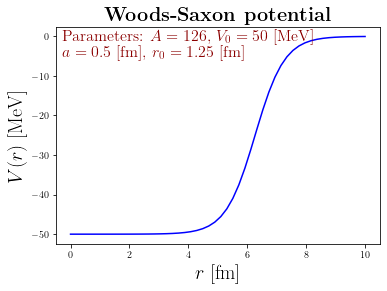

In [12]:
import numpy as np
from  matplotlib import pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.units as units
import matplotlib.ticker as ticker
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Woods-Saxon potential']})
font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }
v0 = 50
A = 126
a = 0.5
r0 = 1.25
R = r0*A**(0.3333)
x = np.linspace(0.0, 10.0)
y = -v0/(1+np.exp((x-R)/a))

plt.plot(x, y, 'b-')
plt.title(r'{\bf Woods-Saxon potential}', fontsize=20)     
plt.text(-0.3, -1, r'Parameters: $A=126$, $V_0=50$ [MeV]', fontdict=font)
plt.text(-0.3, -5, r'$a=0.5$ [fm], $r_0=1.25$ [fm]', fontdict=font)
plt.xlabel(r'$r$ [fm]',fontsize=20)
plt.ylabel(r'$V(r)$ [MeV]',fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

From the plot we notice that the potential
* rapidly approaches zero as $r$ goes to infinity, reflecting the short-distance nature of the strong nuclear force.

* For large $A$, it is approximately flat in the center.

* Nucleons near the surface of the nucleus experience a large force towards the center.






## Single-particle Hamiltonians and spin-orbit force
We have introduced a single-particle Hamiltonian

$$
H_0=\sum_{i=1}^A \hat{h}_0(x_i) =  \sum_{i=1}^A\left(\hat{t}(x_i) + \hat{u}_{\mathrm{ext}}(x_i)\right),
$$

with an external and central symmetric potential $u_{\mathrm{ext}}(x_i)$, which is often 
approximated by a harmonic oscillator potential or a Woods-Saxon potential. Being central symmetric leads to a degeneracy 
in energy which is not observed experimentally. We see this from for example our discussion of separation energies and magic numbers. There are, in addition to the assumed magic numbers from a harmonic oscillator basis of $2,8,20,40,70\dots$ magic numbers like $28$, $50$, $82$ and $126$. 

To produce these additional numbers, we need to add a phenomenological spin-orbit force which lifts the degeneracy, that is

$$
\hat{h}(x_i) =  \hat{t}(x_i) + \hat{u}_{\mathrm{ext}}(x_i) +\xi(\boldsymbol{r})\boldsymbol{ls}=\hat{h}_0(x_i)+\xi(\boldsymbol{r})\boldsymbol{ls}.
$$

## Single-particle Hamiltonians and spin-orbit force
We have introduced a modified single-particle Hamiltonian

$$
\hat{h}(x_i) =  \hat{t}(x_i) + \hat{u}_{\mathrm{ext}}(x_i) +\xi(\boldsymbol{r})\boldsymbol{ls}=\hat{h}_0(x_i)+\xi(\boldsymbol{r})\boldsymbol{ls}.
$$

We can calculate the expectation value of the latter using the fact that

$$
\xi(\boldsymbol{r})\boldsymbol{ls}=\frac{1}{2}\xi(\boldsymbol{r})\left(\boldsymbol{j}^2-\boldsymbol{l}^2-\boldsymbol{s}^2\right).
$$

For a single-particle state with quantum numbers $nlj$ (we suppress $s$ and $m_j$), with $s=1/2$, we obtain the single-particle energies

$$
\varepsilon_{nlj} = \varepsilon_{nlj}^{(0)}+\Delta\varepsilon_{nlj},
$$

with $\varepsilon_{nlj}^{(0)}$ being the single-particle energy obtained with $\hat{h}_0(x)$ and

$$
\Delta\varepsilon_{nlj}=\frac{C}{2}\left(j(j+1)-l(l+1)-\frac{3}{4}\right).
$$

## Single-particle Hamiltonians and spin-orbit force
The spin-orbit force gives thus an additional contribution to the energy

$$
\Delta\varepsilon_{nlj}=\frac{C}{2}\left(j(j+1)-l(l+1)-\frac{3}{4}\right),
$$

which lifts the degeneracy we have seen before in the harmonic oscillator or Woods-Saxon potentials. The value $C$ is the radial
integral involving $\xi(\boldsymbol{r})$. Depending on the value of $j=l\pm 1/2$, we obtain

$$
\Delta\varepsilon_{nlj=l-1/2}=\frac{C}{2}l,
$$

or

$$
\Delta\varepsilon_{nlj=l+1/2}=-\frac{C}{2}(l+1),
$$

clearly lifting the degeneracy. Note well that till now we have simply postulated the spin-orbit force in *ad hoc* way.
This term arises from the nuclear force in a natural way.



## Single-particle Hamiltonians and spin-orbit force
With the spin-orbit force, we can modify our Woods-Saxon potential to

$$
\hat{u}_{\mathrm{ext}}(r)=-\frac{V_0}{1+\exp{(r-R)/a}}+V_{so}(r)\boldsymbol{ls},
$$

with

$$
V_{so}(r) = V_{so}\frac{1}{r}\frac{d f_{so}(r)}{dr},
$$

where we have

$$
f_{so}(r) = \frac{1}{1+\exp{(r-R_{so})/a_{so}}}.
$$

<!-- !split  -->
## Single-particle Hamiltonians and spin-orbit force
We can also add, in case of proton, a Coulomb potential. The
Woods-Saxon potential has been widely used in parametrizations of
effective single-particle potentials.


**However, as was the case with
the harmonic oscillator, none of these potentials are linked directly
to the nuclear forces**. 

This is solved by building a mean field based
on the nucleon-nucleon interaction and forms the basis for the discussions of Brown and Hergert.






## Single-particle Hamiltonians and spin-orbit force
The Woods-Saxon potential does allow for closed-form or analytical solutions of the eigenvalue problem

$$
\hat{h}_0(x_i)\psi_{\alpha}(x_i)=\varepsilon_{\alpha}\psi_{\alpha}(x_i).
$$

For the harmonic oscillator in three dimensions we have closed-form expressions for the energies and analytical solutions for the eigenstates,
with the latter given by either Hermite polynomials (cartesian coordinates) or Laguerre polynomials (spherical coordinates).

To solve the above equation is however rather straightforward numerically.



## Numerical solution of the single-particle Schroedinger equation
We will illustrate the numerical solution of Schroedinger's equation by solving it for the harmonic oscillator in three dimensions.
It is straightforward to change the harmonic oscillator potential with a Woods-Saxon potential, or any other type of potentials. 

We are interested in the solution of the radial part of Schroedinger's equation for one nucleon. 
The angular momentum part  is given by the so-called Spherical harmonics. 

The radial equation reads

$$
-\frac{\hbar^2}{2 m} \left ( \frac{1}{r^2} \frac{d}{dr} r^2
  \frac{d}{dr} - \frac{l (l + 1)}{r^2} \right )R(r) 
     + V(r) R(r) = E R(r).
$$

## Numerical solution of the single-particle Schroedinger equation
In our case $V(r)$ is the harmonic oscillator potential $(1/2)kr^2$ with
$k=m\omega^2$ and $E$ is
the energy of the harmonic oscillator in three dimensions.
The oscillator frequency is $\omega$ and the energies are

$$
E_{nl}=  \hbar \omega \left(2n+l+\frac{3}{2}\right),
$$

with $n=0,1,2,\dots$ and $l=0,1,2,\dots$.





## Numerical solution of the single-particle Schroedinger equation
Since we have made a transformation to spherical coordinates it means that 
$r\in [0,\infty)$.  
The quantum number
$l$ is the orbital momentum of the nucleon.   Then we substitute $R(r) = (1/r) u(r)$ and obtain

$$
-\frac{\hbar^2}{2 m} \frac{d^2}{dr^2} u(r) 
       + \left ( V(r) + \frac{l (l + 1)}{r^2}\frac{\hbar^2}{2 m}
                                    \right ) u(r)  = E u(r) .
$$

The boundary conditions are $u(0)=0$ and $u(\infty)=0$.




## Numerical solution of the single-particle Schroedinger equation
We introduce a dimensionless variable $\rho = (1/\alpha) r$
where $\alpha$ is a constant with dimension length and get

$$
-\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) 
       + \left ( V(\rho) + \frac{l (l + 1)}{\rho^2}
         \frac{\hbar^2}{2 m\alpha^2} \right ) u(\rho)  = E u(\rho) .
$$

Let us specialize to $l=0$. 
Inserting $V(\rho) = (1/2) k \alpha^2\rho^2$ we end up with

$$
-\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) 
       + \frac{k}{2} \alpha^2\rho^2u(\rho)  = E u(\rho) .
$$

We multiply thereafter with $2m\alpha^2/\hbar^2$ on both sides and obtain

$$
-\frac{d^2}{d\rho^2} u(\rho) 
       + \frac{mk}{\hbar^2} \alpha^4\rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) .
$$

## Numerical solution of the single-particle Schroedinger equation
We have thus

$$
-\frac{d^2}{d\rho^2} u(\rho) 
       + \frac{mk}{\hbar^2} \alpha^4\rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) .
$$

The constant $\alpha$ can now be fixed
so that

$$
\frac{mk}{\hbar^2} \alpha^4 = 1,
$$

or

$$
\alpha = \left(\frac{\hbar^2}{mk}\right)^{1/4}.
$$

## Numerical solution of the single-particle Schroedinger equation
Defining

$$
\lambda = \frac{2m\alpha^2}{\hbar^2}E,
$$

we can rewrite Schroedinger's equation as

$$
-\frac{d^2}{d\rho^2} u(\rho) + \rho^2u(\rho)  = \lambda u(\rho) .
$$

This is the first equation to solve numerically. In three dimensions 
the eigenvalues for $l=0$ are 
$\lambda_0=3,\lambda_1=7,\lambda_2=11,\dots .$





## Numerical solution of the single-particle Schroedinger equation
We use the standard
expression for the second derivative of a function $u$

<!-- Equation labels as ordinary links -->
<div id="eq:diffoperation"></div>

$$
\begin{equation}
    u''=\frac{u(\rho+h) -2u(\rho) +u(\rho-h)}{h^2} +O(h^2),
\label{eq:diffoperation} \tag{1}
\end{equation}
$$

where $h$ is our step.
Next we define minimum and maximum values for the variable $\rho$,
$\rho_{\mathrm{min}}=0$  and $\rho_{\mathrm{max}}$, respectively.
You need to check your results for the energies against different values
$\rho_{\mathrm{max}}$, since we cannot set
$\rho_{\mathrm{max}}=\infty$.




## Numerical solution of the single-particle Schroedinger equation
With a given number of steps, $n_{\mathrm{step}}$, we then 
define the step $h$ as

$$
h=\frac{\rho_{\mathrm{max}}-\rho_{\mathrm{min}} }{n_{\mathrm{step}}}.
$$

Define an arbitrary value of $\rho$ as

$$
\rho_i= \rho_{\mathrm{min}} + ih \hspace{1cm} i=0,1,2,\dots , n_{\mathrm{step}}
$$

we can rewrite the Schroedinger equation for $\rho_i$ as

$$
-\frac{u(\rho_i+h) -2u(\rho_i) +u(\rho_i-h)}{h^2}+\rho_i^2u(\rho_i)  = \lambda u(\rho_i),
$$

or in  a more compact way

$$
-\frac{u_{i+1} -2u_i +u_{i-1}}{h^2}+\rho_i^2u_i=-\frac{u_{i+1} -2u_i +u_{i-1} }{h^2}+V_iu_i  = \lambda u_i.
$$

## Numerical solution of the single-particle Schroedinger equation
Define first the diagonal matrix element

$$
d_i=\frac{2}{h^2}+V_i,
$$

and the non-diagonal matrix element

$$
e_i=-\frac{1}{h^2}.
$$

In this case the non-diagonal matrix elements are given by a mere constant. *All non-diagonal matrix elements are equal*.




## Numerical solution of the single-particle Schroedinger equation
With these definitions the Schroedinger equation takes the following form

$$
d_iu_i+e_{i-1}u_{i-1}+e_{i+1}u_{i+1}  = \lambda u_i,
$$

where $u_i$ is unknown. We can write the 
latter equation as a matrix eigenvalue problem

<!-- Equation labels as ordinary links -->
<div id="eq:sematrix"></div>

$$
\begin{equation}
    \left( \begin{array}{ccccccc} d_1 & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & d_2 & e_2 & 0    & \dots  &0     &0 \\
                                0   & e_2 & d_3 & e_3  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &d_{n_{\mathrm{step}}-2} & e_{n_{\mathrm{step}}-1}\\
                                0   & \dots & \dots & \dots  &\dots       &e_{n_{\mathrm{step}}-1} & d_{n_{\mathrm{step}}-1}
             \end{array} \right)      \left( \begin{array}{c} u_{1} \\
                                                              u_{2} \\
                                                              \dots\\ \dots\\ \dots\\
                                                              u_{n_{\mathrm{step}}-1}
             \end{array} \right)=\lambda \left( \begin{array}{c} u_{1} \\
                                                              u_{2} \\
                                                              \dots\\ \dots\\ \dots\\
                                                              u_{n_{\mathrm{step}}-1}
             \end{array} \right) 
\label{eq:sematrix} \tag{2}
\end{equation}
$$

## Numerical solution of the single-particle Schroedinger equation

To be more detailed we have

<!-- Equation labels as ordinary links -->
<div id="eq:matrixse"></div>

$$
\begin{equation}
    \left( \begin{array}{ccccccc} \frac{2}{h^2}+V_1 & -\frac{1}{h^2} & 0   & 0    & \dots  &0     & 0 \\
                                -\frac{1}{h^2} & \frac{2}{h^2}+V_2 & -\frac{1}{h^2} & 0    & \dots  &0     &0 \\
                                0   & -\frac{1}{h^2} & \frac{2}{h^2}+V_3 & -\frac{1}{h^2}  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &\frac{2}{h^2}+V_{n_{\mathrm{step}}-2} & -\frac{1}{h^2}\\
                                0   & \dots & \dots & \dots  &\dots       &-\frac{1}{h^2} & \frac{2}{h^2}+V_{n_{\mathrm{step}}-1}
             \end{array} \right)  
\label{eq:matrixse} \tag{3} 
\end{equation}
$$

Recall that the solutions are known via the boundary conditions at
$i=n_{\mathrm{step}}$ and at the other end point, that is for  $\rho_0$.
The solution is zero in both cases.





## Program to solve Schroedinger's equation
The following python program is an example of how one can obtain the eigenvalues for a single-nucleon moving in a harmonic oscillator potential. It is rather easy to change the onebody-potential with ones like a Woods-Saxon potential.




## Program to solve Schroedinger's equation
The code sets up the Hamiltonian matrix by defining the the minimun and maximum values of $r$ with a
maximum value of integration points.  These are set in the initialization function. It plots the 
eigenfunctions of the three lowest eigenstates.

-49.71152708931414
-48.99104679769459
-47.95247675603978


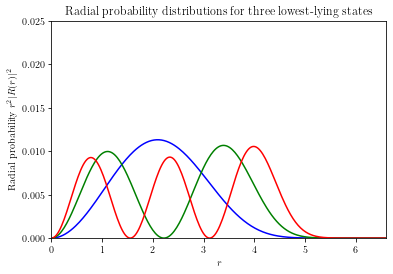

In [41]:
#Program which solves the one-particle Schrodinger equation
#for a potential specified in function
#potential().

from  matplotlib import pyplot as plt

import numpy as np
#Function for initialization of parameters
def initialize():
    RMin = 0.0
    RMax = 10.0
    lOrbital = 0
    Dim = 400
    return RMin, RMax, lOrbital, Dim
#A few Potentials
def potential(r):
    pottype = "ws"
    if(pottype == "ws"):
        A = 126
        a = 0.524
        R = 1.25 * A**(1.0/3.0)
        V0 = 50.0
        V = - V0 / (1+np.exp((r-R)/a))
    elif(pottype == "ho"):
        V = 0.5*r*r
    return V
    #  return 0.5*r*r
    #  return 0.0
    #  return -1.0/r
    #if r >= 0.0 and r <= 10.0:
    #    V = -0.05
    #else:
    #    V =0.0
    #return V


#Get the boundary, orbital momentum and number of integration points
RMin, RMax, lOrbital, Dim = initialize()
lOrbital = 0
#Initialize constants
Step    = RMax/(Dim+1)
DiagConst = 1.0/ (Step*Step)
NondiagConst =  -0.5 / (Step*Step)
OrbitalFactor = 0.5*lOrbital * (lOrbital + 1.0)

#Calculate array of potential values
v = np.zeros(Dim)
r = np.linspace(RMin,RMax,Dim)
for i in range(Dim):
    r[i] = RMin + (i+1) * Step;
    v[i] = potential(r[i]) + OrbitalFactor/(r[i]*r[i]);

#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Matrix = np.zeros((Dim,Dim))
Matrix[0,0] = DiagConst + v[0];
Matrix[0,1] = NondiagConst;
for i in range(1,Dim-1):
    Matrix[i,i-1]  = NondiagConst;
    Matrix[i,i]    = DiagConst + v[i];
    Matrix[i,i+1]  = NondiagConst;
Matrix[Dim-1,Dim-2] = NondiagConst;
Matrix[Dim-1,Dim-1] = DiagConst + v[Dim-1];
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Matrix)
# sort eigenvectors and eigenvalues
permute = EigValues.argsort()
EigValues = EigValues[permute]
EigVectors = EigVectors[:,permute]
# now plot the results for the three lowest lying eigenstates
for i in range(3):
    print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
ThirdEigvector = EigVectors[:,2]
plt.plot(r, FirstEigvector**2 ,'b-',r, SecondEigvector**2 ,'g-',r, ThirdEigvector**2 ,'r-')
plt.axis([0,6.6,0.0, 0.025])
plt.xlabel(r'$r$')
plt.ylabel(r'Radial probability $r^2|R(r)|^2$')
plt.title(r'Radial probability distributions for three lowest-lying states')
plt.show()

In [80]:
#Program which solves the one-particle Schrodinger equation
#for a potential specified in function
#potential().

# This is EXTREMELY inefficient, but it's a good illustration!

from  matplotlib import pyplot as plt
import numpy as np

#For labels
def spect_label(n,l,s):
    if l == 0:
        spect = 's'
    elif l == 1:
        spect = 'p'
    elif l == 2:
        spect = 'd'
    elif l == 3:
        spect = 'f'
    elif l == 4:
        spect = 'g'
    elif l == 5:
        spect = 'h'
    elif l == 6:
        spect = 'i'
    elif l == 7:
        spect = 'j'
    if(s==0):
        return "${n:d}$".format(n=n)+spect
    else:
        return "${n:d}$".format(n=n)+spect+"${s:.2f}$".format(s=s)

#Function for initialization of parameters
def initialize():
    RMin = 0.0
    RMax = 10.0
    lOrbital = 0
    Dim = 400
    return RMin, RMax, lOrbital, Dim
#A few Potentials
def potential(r):
    pottype = "ws"
    if(pottype == "ws"):
        A = 20
        a = 0.524
        R = 1.25 * A**(1.0/3.0)
        V0 = 50.0
        V = - V0 / (1+np.exp((r-R)/a))
    elif(pottype == "ho"):
        V = 0.5*r*r
    return V
    #  return 0.5*r*r
    #  return 0.0
    #  return -1.0/r
    #if r >= 0.0 and r <= 10.0:
    #    V = -0.05
    #else:
    #    V =0.0
    #return V

def solution(n,l,s):
    #Get the boundary, orbital momentum and number of integration points
    RMin, RMax, lOrbital, Dim = initialize()
    lOrbital = l
    #Initialize constants
    Step    = RMax/(Dim+1)
    DiagConst = 1.0/ (Step*Step)
    NondiagConst =  -0.5 / (Step*Step)
    OrbitalFactor = 0.5*lOrbital * (lOrbital + 1.0)

    #Calculate array of potential values
    v = np.zeros(Dim)
    r = np.linspace(RMin,RMax,Dim)
    for i in range(Dim):
        r[i] = RMin + (i+1) * Step;
        v[i] = potential(r[i]) + OrbitalFactor/(r[i]*r[i]);

    #Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
    Matrix = np.zeros((Dim,Dim))
    Matrix[0,0] = DiagConst + v[0];
    Matrix[0,1] = NondiagConst;
    for i in range(1,Dim-1):
        Matrix[i,i-1]  = NondiagConst;
        Matrix[i,i]    = DiagConst + v[i];
        Matrix[i,i+1]  = NondiagConst;
    Matrix[Dim-1,Dim-2] = NondiagConst;
    Matrix[Dim-1,Dim-1] = DiagConst + v[Dim-1];
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Matrix)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    # now plot the results for the three lowest lying eigenstates

    return EigVectors[:,n], EigValues[n]



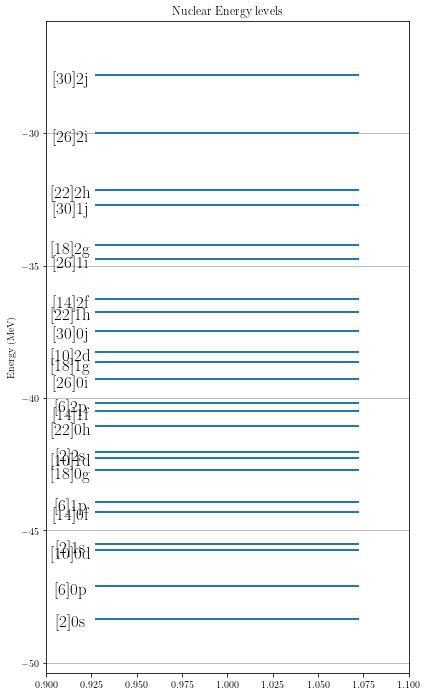

In [82]:
#plt.plot(r, FirstEigvector**2 ,'b-',r, SecondEigvector**2 ,'g-',r, ThirdEigvector**2 ,'r-')
#plt.axis([0,6.6,0.0, 0.025])
#plt.xlabel(r'$r$')
#plt.ylabel(r'Radial probability $r^2|R(r)|^2$')
#plt.title(r'Radial probability distributions for three lowest-lying states')

orbital=[r'$1s_{1/2}$',r'$1p_{3/2}$',r'$1p_{1/2}$',r'$1d_{5/2}$',r'$2s_{1/2}$',r'$1d_{3/2}$',r'$1f_{7/2}$',r'$2p_{3/2}$',r'$1f_{5/2}$',r'$2p_{1/2}$',r'$1g_{9/2}$',r'$2d_{5/2}$',r'$1g_{7/2}$',r'$3s_{1/2}$',r'$2d_{3/2}$']

E = []
label = []

for n in range(3):
    for l in range(8):
        eigvec, eigval = solution(n,l,0)
        E.append(eigval)
        occ = 2*(2*l+1)
        label.append("[{occ:d}]".format(occ=occ)+spect_label(n,l,0))
        #label.append(r'$n={n:d} l={l:d}$'.format(n=n, l=l))

x = [1] * len(E)

#fig, ax =plt.subplots()
fig, ax = plt.subplots(figsize=(6.5, 12))
ax.scatter(x, E, s=70000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')

for xi,yi,tx in zip(x,E,label):
    ax.annotate(tx, xy=(0.91*xi,yi), xytext=(7,5), size=17,
                ha="center",va='top', textcoords="offset points")
# for xi, yi, tx in zip(x, E, orbital):
#     ax.annotate(tx, xy=(.65*xi, yi), xytext=(7, 3), size=5,
#                 ha="center", va='top', textcoords="offset points")
ax.margins(0.1)
plt.ylabel('Energy (MeV)')
plt.title('Nuclear Energy levels')
plt.xlim([0.9,1.1])



plt.show()

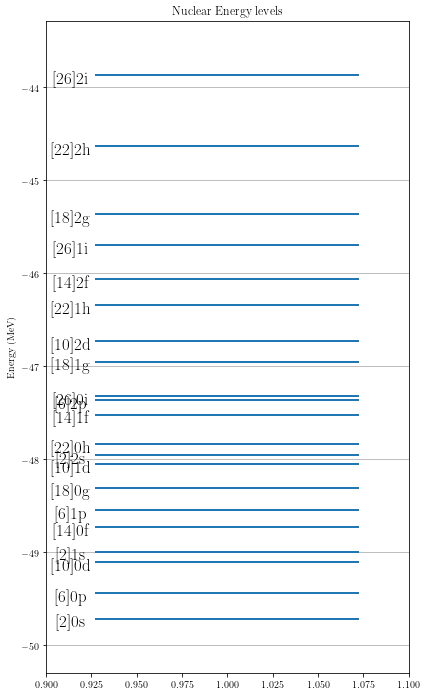

In [75]:

E = []
label = []

for n in range(4):
    for l in range(7):
        eigvec, eigval = solution(n,l,0)
        E.append(eigval)
        occ = 2*(2*l+1)
        label.append("[{occ:d}]".format(occ=occ)+spect_label(n,l,0))
        #label.append(r'$n={n:d} l={l:d}$'.format(n=n, l=l))

x = [1] * len(E)

#fig, ax =plt.subplots()
fig, ax = plt.subplots(figsize=(6.5, 12))
ax.scatter(x, E, s=70000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')

for xi,yi,tx in zip(x,E,label):
    ax.annotate(tx, xy=(0.91*xi,yi), xytext=(7,5), size=17,
                ha="center",va='top', textcoords="offset points")
# for xi, yi, tx in zip(x, E, orbital):
#     ax.annotate(tx, xy=(.65*xi, yi), xytext=(7, 3), size=5,
#                 ha="center", va='top', textcoords="offset points")
ax.margins(0.1)
plt.ylabel('Energy (MeV)')
plt.title('Nuclear Energy levels')
plt.xlim([0.9,1.1])



plt.show()